## Load the files and prepare data

This is a basic python wordcloud. After loading the packages, we need some data preparation and we're good to go.

In [138]:
# Importing modules
import pandas as pd
import os
import re 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import nltk
os.chdir ('...') # Read path for papers

In [136]:
# Load additional packages in Jupyter, if required
# !pip3 install nltk

Defaulting to user installation because normal site-packages is not writeable


## Wordcloud

In [131]:
tweets = pd.read_csv('IchBinHanna.csv', encoding='utf-8', dtype='unicode') # read and print head
# Download stopwords in case you don't have it
# nltk.download("stopwords")

The wordcloud uses a mask, remove to get a classic image.  

## Create Wordcloud with image contour

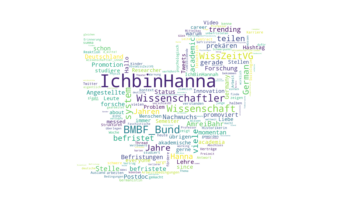

In [160]:
# Import the wordcloud libraries
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator 


# Load image as mask for the wordcloud. Outcomment to remove mask
twitter_mask = np.array(Image.open('twitter.jpeg'))

# Remove empty lines inside twitter data and replace with 0
tweets[['text']].fillna(0)

# Stopwords
from nltk.corpus import stopwords

# print(stopwords.words('german'))

# Load stopwords. Usernames are removed, and some additional noise. Due to the min_word_length, however, there are redundancies
stopwords = set(stopwords.words('german', 'english'))
stopwords.update([
    "https" , "co", "und", "t", "n", "nhttps", "\n", "RT", "de", "innen", "hurls", "or", "as", "doesn't", "tbesonders", "WissZe", "hätte", "Tweet",
    "laude", "Kristin Eichhorn", "Amrei Bahr", "AmbreiBahr", "jsuedekum", "DrKEeichhorn", "SebastianKubon", "Jens", "schorn_stephan", "d_wittel", 
    "martin_hebart", "jenniferhenkeHB", "KorteBarbara", "Alina", "pia_lamberty", "DegnerAnja", "Fischblog", "Kinofrau1", "DrKEichhorn", "sahiralsaid",   
    ])

# Generate the wordcloud
cloud = ','.join(list(tweets['text'].astype(str)))

# If you want to include phrases, use collocations=True

wordcloud = WordCloud(stopwords = stopwords, background_color="white", min_word_length = 5, relative_scaling=0.5 , 
                      mask=twitter_mask, collocations=False, max_words=180, contour_width=0, contour_color='steelblue', 
                      width=800, height=600).generate(cloud)

# Maybe join text with colours from the image. (Only useful for colourful images)
# image_colors = ImageColorGenerator(twitter_mask)
# plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


# Alternative configuration without matplotlib
# wordcloud.generate(cloud)# Visualize the word cloud
# wordcloud.to_image()

# Export
#filename = input('Please give the file a name and avoid overriding\n') + '.png'
#plt.savefig("/media/s/Linux_storage/Analyse_Verkehrswende_Transformation/plots/" + filename, dpi=300)
plt.savefig(".../wordcloud.png", dpi=300)
plt.show()

## Group items: Some extra stuff

List of likes per languages. You may want to use any correlation.

In [161]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

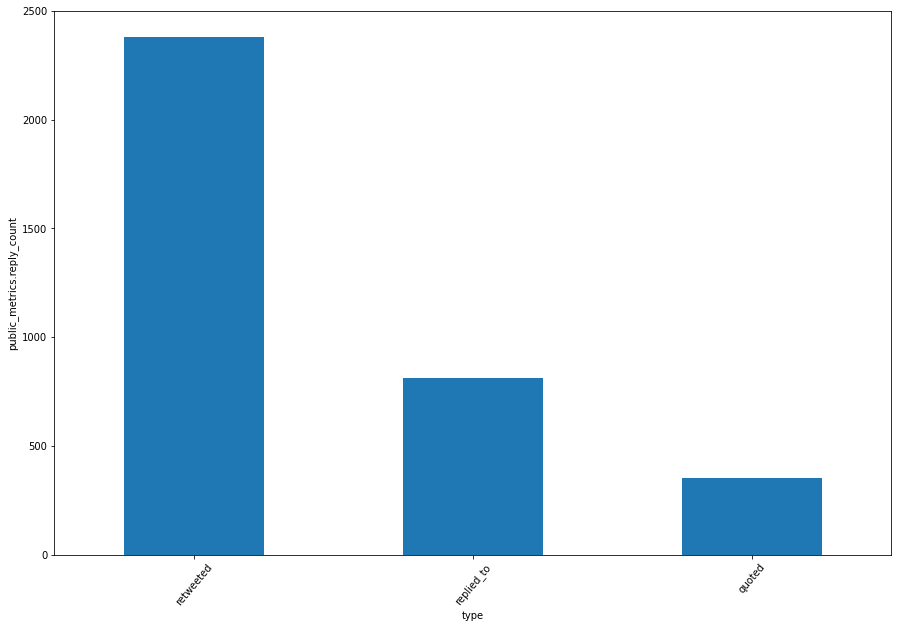

In [167]:
country = tweets.groupby("type")

# Summary statistic of all languages
# country.describe().head()
# List languages by like
# country.mean().sort_values(by="public_metrics.like_count",ascending=False).head()

plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("type")
plt.ylabel("public_metrics.reply_count")
plt.show()